In [9]:
import numpy
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()


def stand (x, mean, std_dev):
    #x: value being standardized
    #mean: mean of data
    #std_dev: standard deviation of data
    return (x-mean)/std_dev

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving data.txt to data (1).txt


In [10]:
def error_funct(m, b, x, y):
    #m: slope
    #b: intercept
    #x: list of x values
    #y: list of y values

    N = len(x)
    error = 0.0
    for i in range(N):
        error += (y[i]-(m*x[i]+b))**2
    return error/N

In [11]:
def part_deriv_m(x, y, m, b):
    N=len(x)
    derivative_m = 0.0
    for i in range(N):
        derivative_m += -x[i]*(y[i]-(m*x[i]+b))
    return (2/N)* derivative_m

def part_deriv_b(x, y, m ,b):
    N=len(x)
    derivative_b = 0.0
    for i in range(N):
        derivative_b += -(y[i]-(m*x[i]+b))
    return (2/N)*derivative_b


In [12]:
def update_param(m, b, alpha, x, y):
    #alpha: learning rate

    N = len(x)
    derivative_m = 0.0
    derivative_b = 0.0
    for i in range(N):
        derivative_m += -x[i]*(y[i]-(m*x[i]+b))
        derivative_b += -(y[i]-(m*x[i]+b))
    derivative_m = (2/N)*derivative_m
    derivative_b = (2/N)*derivative_b

    m_new = m - alpha * derivative_m
    b_new = b - alpha * derivative_b

    return m_new, b_new


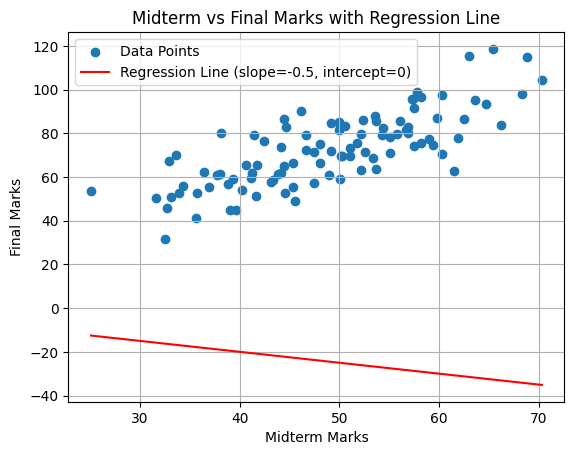

In [13]:
m = -0.5
b = 0
alpha = 0.0001
import os #was used to correct directory issue in file
import pandas as pd
import matplotlib.pyplot as plt

cwd = os.getcwd()

# Read the data from the text file
#ENSURE FILE IS IN SAME DIRECTORY AND NAMED "data.txt"
midterm_marks = []
final_marks = []
with open('data.txt', 'r') as file:
    # Skip the header line
    next(file)
    for line in file:
        midterm, final = map(float, line.split(','))
        midterm_marks.append(midterm)
        final_marks.append(final)

# Create a scatter plot
plt.scatter(midterm_marks, final_marks, label='Data Points')

# Define the regression line
slope = -0.5
intercept = 0
x_range = [min(midterm_marks), max(midterm_marks)]
y_range = [slope * x + intercept for x in x_range]

# Plot the regression line
plt.plot(x_range, y_range, color='red', label=f'Regression Line (slope={slope}, intercept={intercept})')

plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm vs Final Marks with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


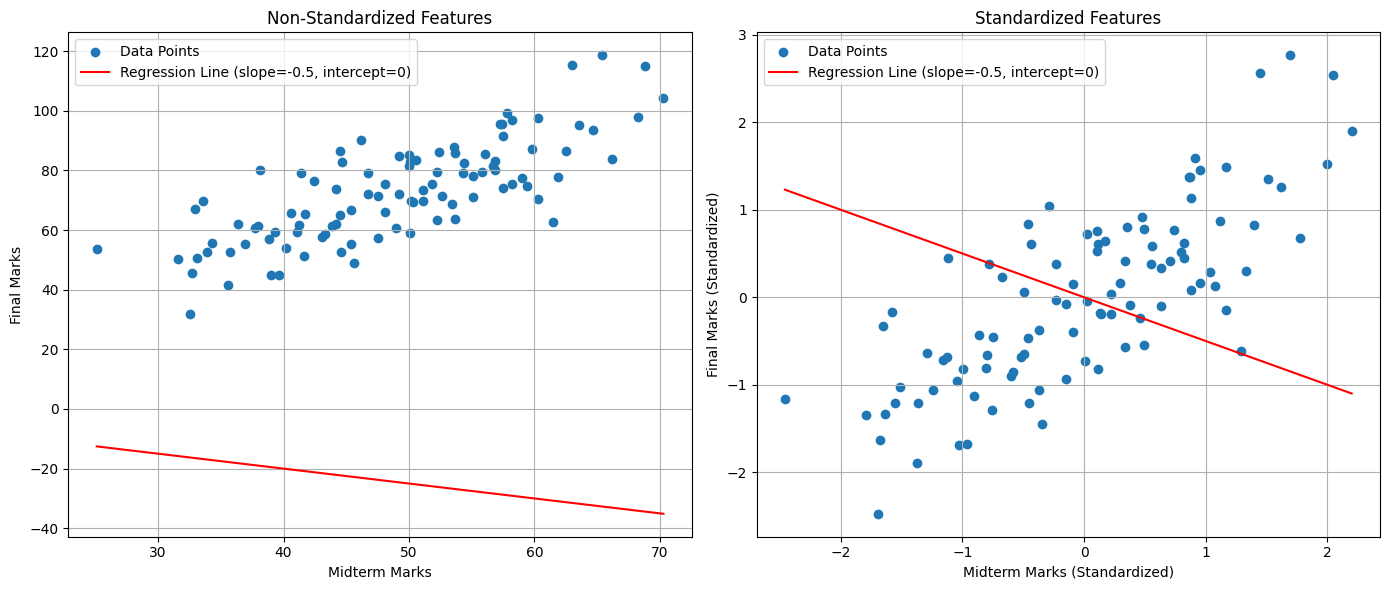

In [14]:
import os #used to check error with directory
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the text file
midterm_marks = []
final_marks = []
with open('data.txt', 'r') as file:
    # Skip the header line
    next(file)
    for line in file:
        midterm, final = map(float, line.split(','))
        midterm_marks.append(midterm)
        final_marks.append(final)

# Feature scaling (normalization)
midterm_mean = np.mean(midterm_marks)
midterm_std = np.std(midterm_marks)
midterm_marks_std = [(x - midterm_mean) / midterm_std for x in midterm_marks]

final_mean = np.mean(final_marks)
final_std = np.std(final_marks)
final_marks_std = [(y - final_mean) / final_std for y in final_marks]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Non-standardized plot
axs[0].scatter(midterm_marks, final_marks, label='Data Points')
x_range = [min(midterm_marks), max(midterm_marks)]
y_range = [-0.5 * x for x in x_range]

axs[0].plot(x_range, y_range, color='red', label=f'Regression Line (slope=-0.5, intercept=0)')
axs[0].set_xlabel('Midterm Marks')
axs[0].set_ylabel('Final Marks')
axs[0].set_title('Non-Standardized Features')
axs[0].legend()
axs[0].grid(True)

# Standardized plot
axs[1].scatter(midterm_marks_std, final_marks_std, label='Data Points')
x_range_std = [min(midterm_marks_std), max(midterm_marks_std)]
y_range_std = [-0.5 * x for x in x_range_std]

axs[1].plot(x_range_std, y_range_std, color='red', label=f'Regression Line (slope=-0.5, intercept=0)')
axs[1].set_xlabel('Midterm Marks (Standardized)')
axs[1].set_ylabel('Final Marks (Standardized)')
axs[1].set_title('Standardized Features')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


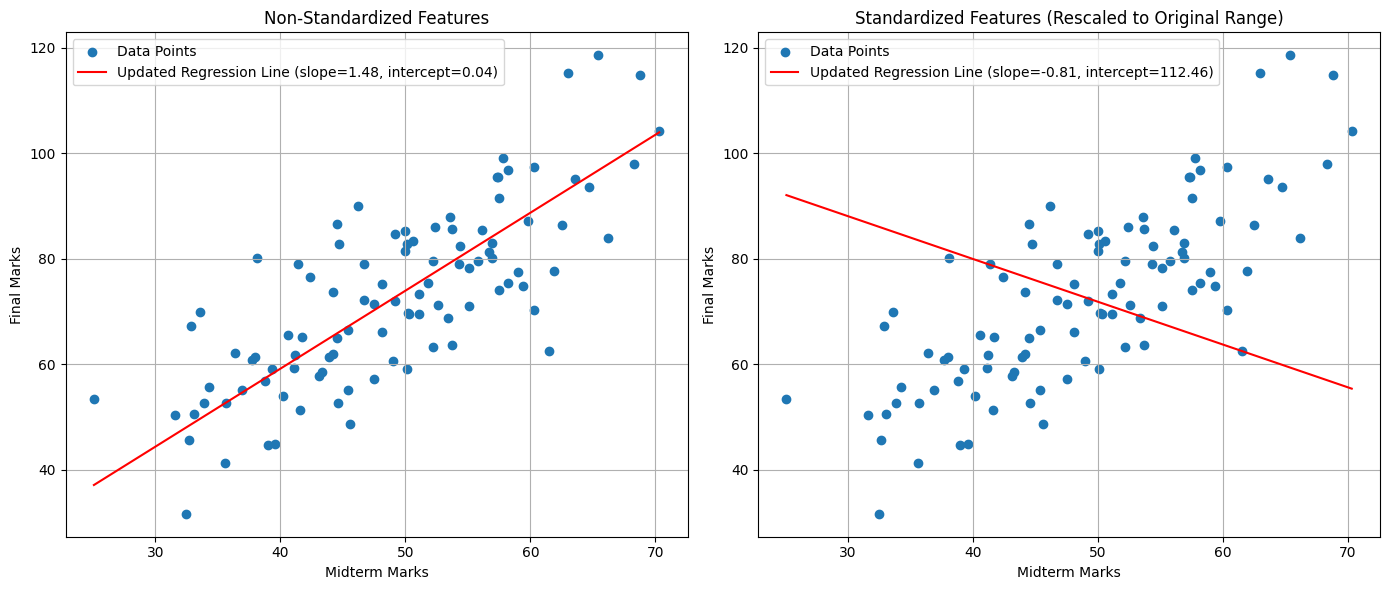

In [15]:
#gradient discent for 100 iterations
import matplotlib.pyplot as plt
import numpy as np

# Define the partial derivative functions
def part_deriv_m(x, y, m, b):
    N = len(x)
    derivative_m = 0.0
    for i in range(N):
        derivative_m += -x[i] * (y[i] - (m * x[i] + b))
    return (2 / N) * derivative_m

def part_deriv_b(x, y, m, b):
    N = len(x)
    derivative_b = 0.0
    for i in range(N):
        derivative_b += -(y[i] - (m * x[i] + b))
    return (2 / N) * derivative_b

def update_param(m, b, alpha, x, y):
    derivative_m = part_deriv_m(x, y, m, b)
    derivative_b = part_deriv_b(x, y, m, b)
    m_new = m - alpha * derivative_m
    b_new = b - alpha * derivative_b
    return m_new, b_new

def error_function(m, b, x, y):
    N = len(x)
    error = 0.0
    for i in range(N):
        error += (y[i] - (m * x[i] + b)) ** 2
    return error / N

# Read the data from the text file
midterm_marks = []
final_marks = []
with open('data.txt', 'r') as file:
    next(file)
    for line in file:
        midterm, final = map(float, line.split(','))
        midterm_marks.append(midterm)
        final_marks.append(final)

# Feature scaling (standardization)
midterm_mean = np.mean(midterm_marks)
midterm_std = np.std(midterm_marks)
midterm_marks_std = [(x - midterm_mean) / midterm_std for x in midterm_marks]

final_mean = np.mean(final_marks)
final_std = np.std(final_marks)
final_marks_std = [(y - final_mean) / final_std for y in final_marks]

# Initialize parameters
m = -0.5
b = 0
alpha = 0.0001
iterations = 100

# Gradient descent for non-standardized features
m_non_std, b_non_std = m, b
for _ in range(iterations):
    m_non_std, b_non_std = update_param(m_non_std, b_non_std, alpha, midterm_marks, final_marks)

# Gradient descent for standardized features
m_std, b_std = m, b
for _ in range(iterations):
    m_std, b_std = update_param(m_std, b_std, alpha, midterm_marks_std, final_marks_std)

# Rescale standardized results back to original range
m_std_rescaled = m_std * (final_std / midterm_std)
b_std_rescaled = b_std * final_std + final_mean - m_std_rescaled * midterm_mean

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Non-standardized plot
axs[0].scatter(midterm_marks, final_marks, label='Data Points')
x_range_non_std = [min(midterm_marks), max(midterm_marks)]
y_range_non_std = [m_non_std * x + b_non_std for x in x_range_non_std]

axs[0].plot(x_range_non_std, y_range_non_std, color='red', label=f'Updated Regression Line (slope={m_non_std:.2f}, intercept={b_non_std:.2f})')
axs[0].set_xlabel('Midterm Marks')
axs[0].set_ylabel('Final Marks')
axs[0].set_title('Non-Standardized Features')
axs[0].legend()
axs[0].grid(True)

# Standardized plot (rescaled to original range)
axs[1].scatter(midterm_marks, final_marks, label='Data Points')
y_range_std_rescaled = [m_std_rescaled * x + b_std_rescaled for x in x_range_non_std]

axs[1].plot(x_range_non_std, y_range_std_rescaled, color='red', label=f'Updated Regression Line (slope={m_std_rescaled:.2f}, intercept={b_std_rescaled:.2f})')
axs[1].set_xlabel('Midterm Marks')
axs[1].set_ylabel('Final Marks')
axs[1].set_title('Standardized Features (Rescaled to Original Range)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


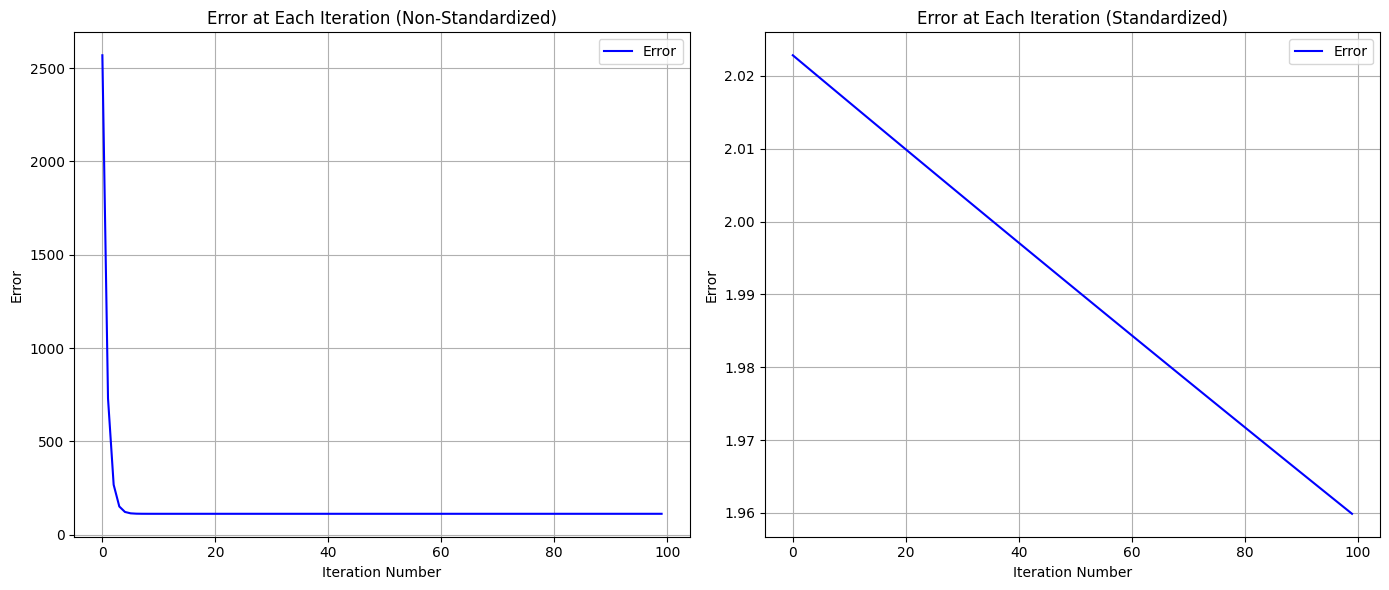

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define the partial derivative functions
def part_deriv_m(x, y, m, b):
    N = len(x)
    derivative_m = 0.0
    for i in range(N):
        derivative_m += -x[i] * (y[i] - (m * x[i] + b))
    return (2 / N) * derivative_m

def part_deriv_b(x, y, m, b):
    N = len(x)
    derivative_b = 0.0
    for i in range(N):
        derivative_b += -(y[i] - (m * x[i] + b))
    return (2 / N) * derivative_b

def update_param(m, b, alpha, x, y):
    derivative_m = part_deriv_m(x, y, m, b)
    derivative_b = part_deriv_b(x, y, m, b)
    m_new = m - alpha * derivative_m
    b_new = b - alpha * derivative_b
    return m_new, b_new

def error_function(m, b, x, y):
    N = len(x)
    error = 0.0
    for i in range(N):
        error += (y[i] - (m * x[i] + b)) ** 2
    return error / N

# Read the data from the text file
midterm_marks = []
final_marks = []
with open('data.txt', 'r') as file:
    next(file)
    for line in file:
        midterm, final = map(float, line.split(','))
        midterm_marks.append(midterm)
        final_marks.append(final)

# Feature scaling (standardization)
midterm_mean = np.mean(midterm_marks)
midterm_std = np.std(midterm_marks)
midterm_marks_std = [(x - midterm_mean) / midterm_std for x in midterm_marks]

final_mean = np.mean(final_marks)
final_std = np.std(final_marks)
final_marks_std = [(y - final_mean) / final_std for y in final_marks]

# Initialize parameters
m = -0.5
b = 0
alpha = 0.0001
iterations = 100

# Error lists
errors_non_std = []
errors_std = []

# Gradient descent for non-standardized features
m_non_std, b_non_std = m, b
for i in range(iterations):
    m_non_std, b_non_std = update_param(m_non_std, b_non_std, alpha, midterm_marks, final_marks)
    error_non_std = error_function(m_non_std, b_non_std, midterm_marks, final_marks)
    errors_non_std.append(error_non_std)

# Gradient descent for standardized features
m_std, b_std = m, b
for i in range(iterations):
    m_std, b_std = update_param(m_std, b_std, alpha, midterm_marks_std, final_marks_std)
    error_std = error_function(m_std, b_std, midterm_marks_std, final_marks_std)
    errors_std.append(error_std)

# Create subplots for error plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Non-standardized error plot
axs[0].plot(range(iterations), errors_non_std, label='Error', color='blue')
axs[0].set_xlabel('Iteration Number')
axs[0].set_ylabel('Error')
axs[0].set_title('Error at Each Iteration (Non-Standardized)')
axs[0].grid(True)
axs[0].legend()

# Standardized error plot
axs[1].plot(range(iterations), errors_std, label='Error', color='blue')
axs[1].set_xlabel('Iteration Number')
axs[1].set_ylabel('Error')
axs[1].set_title('Error at Each Iteration (Standardized)')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


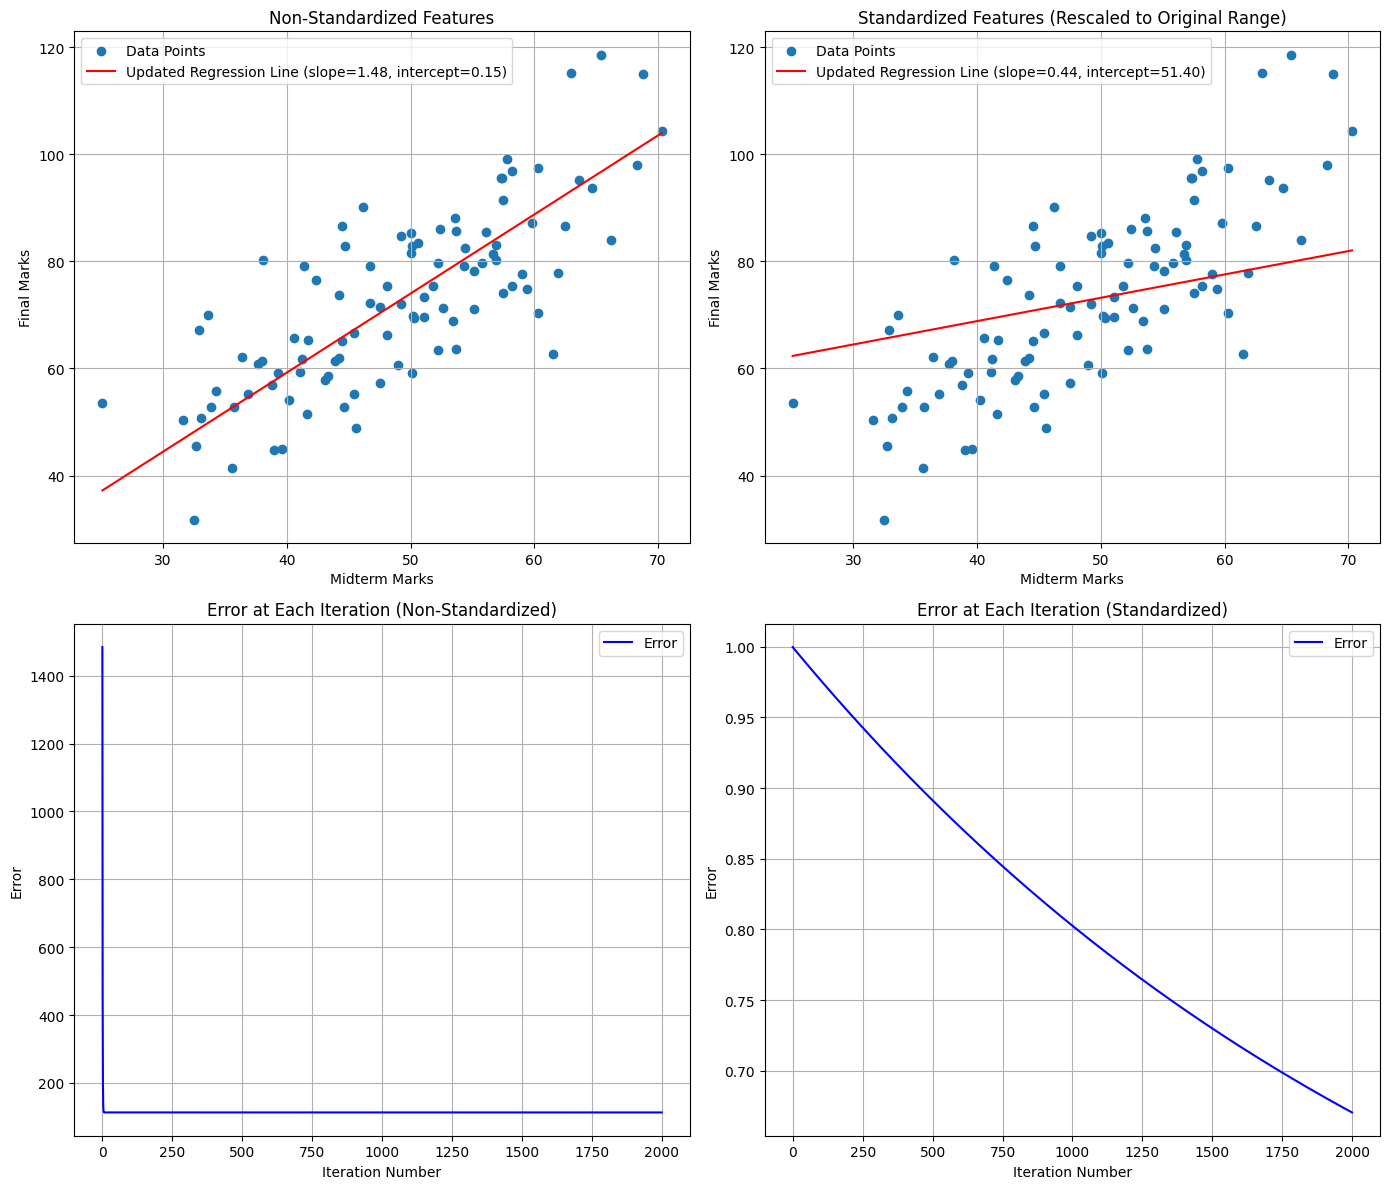

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Define the partial derivative functions
def part_deriv_m(x, y, m, b):
    N = len(x)
    derivative_m = 0.0
    for i in range(N):
        derivative_m += -x[i] * (y[i] - (m * x[i] + b))
    return (2 / N) * derivative_m

def part_deriv_b(x, y, m, b):
    N = len(x)
    derivative_b = 0.0
    for i in range(N):
        derivative_b += -(y[i] - (m * x[i] + b))
    return (2 / N) * derivative_b

def update_param(m, b, alpha, x, y):
    derivative_m = part_deriv_m(x, y, m, b)
    derivative_b = part_deriv_b(x, y, m, b)
    m_new = m - alpha * derivative_m
    b_new = b - alpha * derivative_b
    return m_new, b_new

def error_function(m, b, x, y):
    N = len(x)
    error = 0.0
    for i in range(N):
        error += (y[i] - (m * x[i] + b)) ** 2
    return error / N

# Read the data from the text file
midterm_marks = []
final_marks = []
with open('data.txt', 'r') as file:
    next(file)
    for line in file:
        midterm, final = map(float, line.split(','))
        midterm_marks.append(midterm)
        final_marks.append(final)

# Feature scaling (standardization)
midterm_mean = np.mean(midterm_marks)
midterm_std = np.std(midterm_marks)
midterm_marks_std = [(x - midterm_mean) / midterm_std for x in midterm_marks]

final_mean = np.mean(final_marks)
final_std = np.std(final_marks)
final_marks_std = [(y - final_mean) / final_std for y in final_marks]

# Initialize parameters
m = 0
b = 0
alpha = 0.0001
iterations = 2000

# Error lists
errors_non_std = []
errors_std = []

# Gradient descent for non-standardized features
m_non_std, b_non_std = m, b
for i in range(iterations):
    m_non_std, b_non_std = update_param(m_non_std, b_non_std, alpha, midterm_marks, final_marks)
    error_non_std = error_function(m_non_std, b_non_std, midterm_marks, final_marks)
    errors_non_std.append(error_non_std)

# Gradient descent for standardized features
m_std, b_std = m, b
for i in range(iterations):
    m_std, b_std = update_param(m_std, b_std, alpha, midterm_marks_std, final_marks_std)
    error_std = error_function(m_std, b_std, midterm_marks_std, final_marks_std)
    errors_std.append(error_std)

# Rescale standardized parameters back to original range
m_std_rescaled = m_std * (final_std / midterm_std)
b_std_rescaled = final_mean - m_std_rescaled * midterm_mean

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Non-standardized scatter plot
axs[0, 0].scatter(midterm_marks, final_marks, label='Data Points')
x_range_non_std = np.linspace(min(midterm_marks), max(midterm_marks), 100)
y_range_non_std = m_non_std * x_range_non_std + b_non_std

axs[0, 0].plot(x_range_non_std, y_range_non_std, color='red', label=f'Updated Regression Line (slope={m_non_std:.2f}, intercept={b_non_std:.2f})')
axs[0, 0].set_xlabel('Midterm Marks')
axs[0, 0].set_ylabel('Final Marks')
axs[0, 0].set_title('Non-Standardized Features')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Standardized scatter plot (rescaled to original range)
axs[0, 1].scatter(midterm_marks, final_marks, label='Data Points')
y_range_std_rescaled = m_std_rescaled * x_range_non_std + b_std_rescaled

axs[0, 1].plot(x_range_non_std, y_range_std_rescaled, color='red', label=f'Updated Regression Line (slope={m_std_rescaled:.2f}, intercept={b_std_rescaled:.2f})')
axs[0, 1].set_xlabel('Midterm Marks')
axs[0, 1].set_ylabel('Final Marks')
axs[0, 1].set_title('Standardized Features (Rescaled to Original Range)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Non-standardized error plot
axs[1, 0].plot(range(iterations), errors_non_std, label='Error', color='blue')
axs[1, 0].set_xlabel('Iteration Number')
axs[1, 0].set_ylabel('Error')
axs[1, 0].set_title('Error at Each Iteration (Non-Standardized)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Standardized error plot
axs[1, 1].plot(range(iterations), errors_std, label='Error', color='blue')
axs[1, 1].set_xlabel('Iteration Number')
axs[1, 1].set_ylabel('Error')
axs[1, 1].set_title('Error at Each Iteration (Standardized)')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


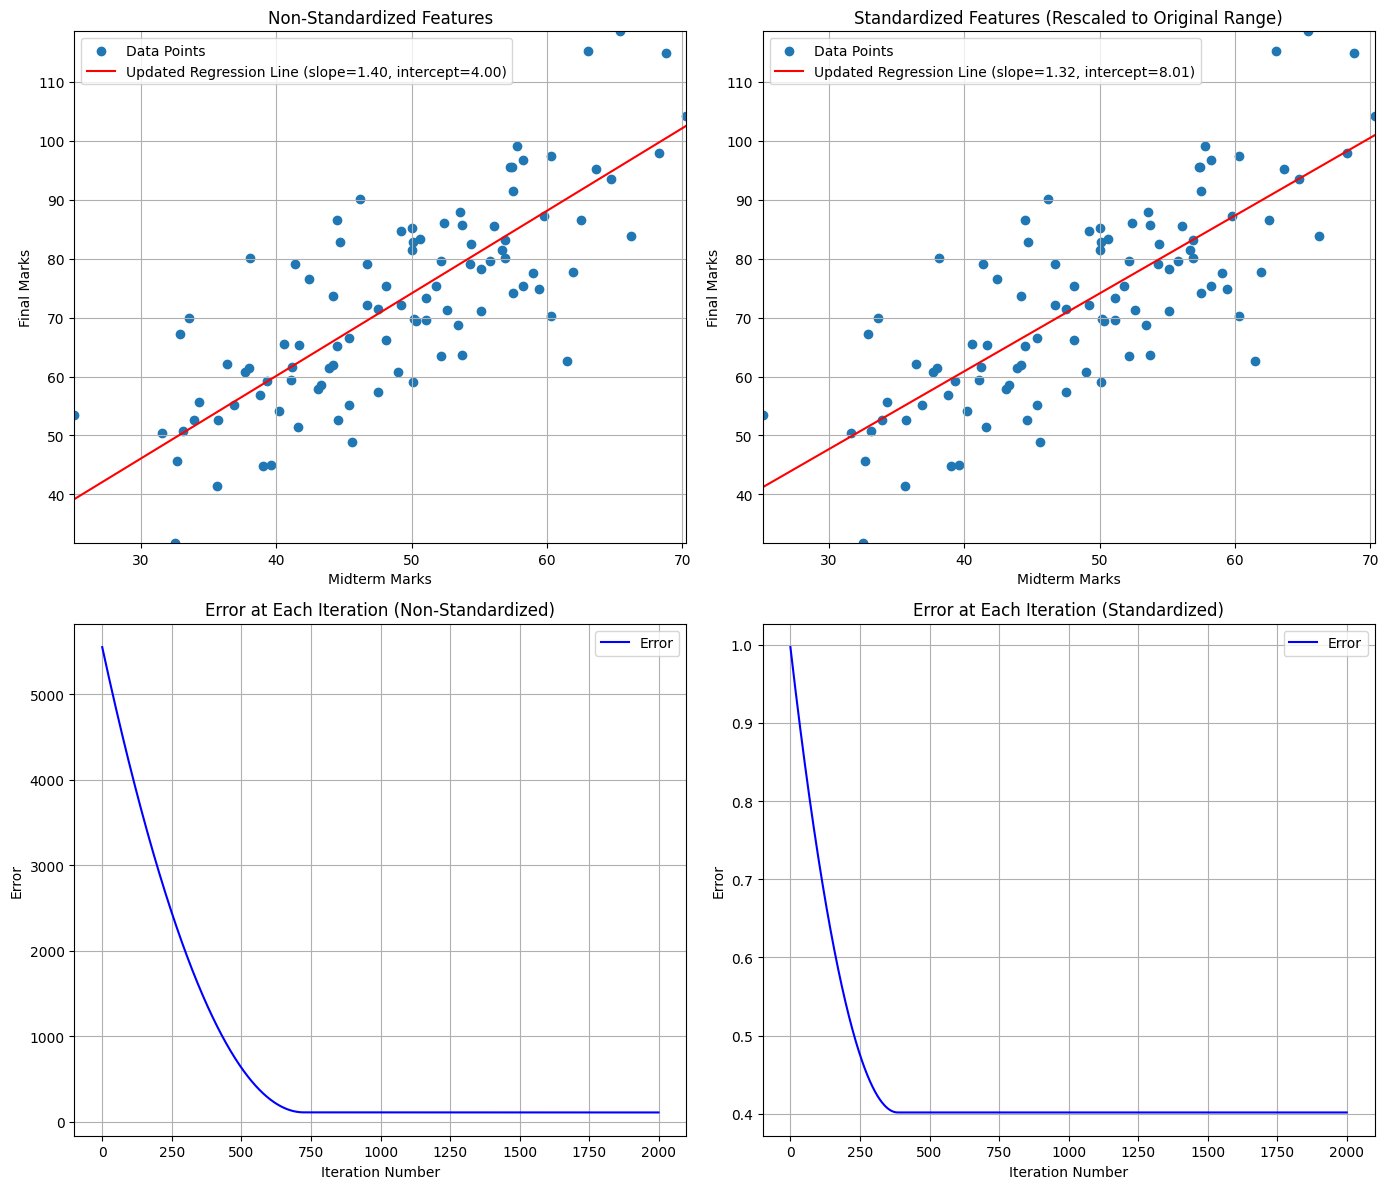

In [18]:
#QUESTION 1: Write your observation by changing the learning rate to 0.1. Include error plots while explaining your observation.
#IMPLEMENTATION:

import matplotlib.pyplot as plt
import numpy as np

# Define the partial derivative functions with gradient clipping
def part_deriv_m(x, y, m, b, clip_value=1.0):
    N = len(x)
    derivative_m = 0.0
    for i in range(N):
        derivative_m += -x[i] * (y[i] - (m * x[i] + b))
    derivative_m = np.clip(derivative_m, -clip_value, clip_value)  # Clip the gradient
    return (2 / N) * derivative_m

def part_deriv_b(x, y, m, b, clip_value=1.0):
    N = len(x)
    derivative_b = 0.0
    for i in range(N):
        derivative_b += -(y[i] - (m * x[i] + b))
    derivative_b = np.clip(derivative_b, -clip_value, clip_value)  # Clip the gradient
    return (2 / N) * derivative_b

def update_param(m, b, alpha, x, y, clip_value=1.0):
    derivative_m = part_deriv_m(x, y, m, b, clip_value)
    derivative_b = part_deriv_b(x, y, m, b, clip_value)
    m_new = m - alpha * derivative_m
    b_new = b - alpha * derivative_b
    return m_new, b_new

def error_function(m, b, x, y):
    N = len(x)
    error = 0.0
    for i in range(N):
        error += (y[i] - (m * x[i] + b)) ** 2
    return error / N

# Read the data from the text file
midterm_marks = []
final_marks = []
with open('data.txt', 'r') as file:
    next(file)
    for line in file:
        midterm, final = map(float, line.split(','))
        midterm_marks.append(midterm)
        final_marks.append(final)

# Feature scaling (standardization)
midterm_mean = np.mean(midterm_marks)
midterm_std = np.std(midterm_marks)
midterm_marks_std = [(x - midterm_mean) / midterm_std for x in midterm_marks]

final_mean = np.mean(final_marks)
final_std = np.std(final_marks)
final_marks_std = [(y - final_mean) / final_std for y in final_marks]

# Initialize parameters
m = 0
b = 0
alpha = 0.1  # Adjust the learning rate
iterations = 2000
clip_value = 1.0  # Set the clipping value

# Error lists
errors_non_std = []
errors_std = []

# Gradient descent for non-standardized features
m_non_std, b_non_std = m, b
for i in range(iterations):
    m_non_std, b_non_std = update_param(m_non_std, b_non_std, alpha, midterm_marks, final_marks, clip_value)
    error_non_std = error_function(m_non_std, b_non_std, midterm_marks, final_marks)
    errors_non_std.append(error_non_std)

# Gradient descent for standardized features
m_std, b_std = m, b
for i in range(iterations):
    m_std, b_std = update_param(m_std, b_std, alpha, midterm_marks_std, final_marks_std, clip_value)
    error_std = error_function(m_std, b_std, midterm_marks_std, final_marks_std)
    errors_std.append(error_std)

# Rescale standardized parameters back to original range
m_std_rescaled = m_std * (final_std / midterm_std)
b_std_rescaled = final_mean - m_std_rescaled * midterm_mean

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Non-standardized scatter plot
axs[0, 0].scatter(midterm_marks, final_marks, label='Data Points')
x_range_non_std = np.linspace(min(midterm_marks), max(midterm_marks), 100)
y_range_non_std = m_non_std * x_range_non_std + b_non_std

axs[0, 0].plot(x_range_non_std, y_range_non_std, color='red', label=f'Updated Regression Line (slope={m_non_std:.2f}, intercept={b_non_std:.2f})')
axs[0, 0].set_xlim([min(midterm_marks), max(midterm_marks)])
axs[0, 0].set_ylim([min(final_marks), max(final_marks)])
axs[0, 0].set_xlabel('Midterm Marks')
axs[0, 0].set_ylabel('Final Marks')
axs[0, 0].set_title('Non-Standardized Features')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Standardized scatter plot (rescaled to original range)
axs[0, 1].scatter(midterm_marks, final_marks, label='Data Points')
y_range_std_rescaled = m_std_rescaled * x_range_non_std + b_std_rescaled

axs[0, 1].plot(x_range_non_std, y_range_std_rescaled, color='red', label=f'Updated Regression Line (slope={m_std_rescaled:.2f}, intercept={b_std_rescaled:.2f})')
axs[0, 1].set_xlim([min(midterm_marks), max(midterm_marks)])
axs[0, 1].set_ylim([min(final_marks), max(final_marks)])
axs[0, 1].set_xlabel('Midterm Marks')
axs[0, 1].set_ylabel('Final Marks')
axs[0, 1].set_title('Standardized Features (Rescaled to Original Range)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Non-standardized error plot
axs[1, 0].plot(range(iterations), errors_non_std, label='Error', color='blue')
axs[1, 0].set_xlabel('Iteration Number')
axs[1, 0].set_ylabel('Error')
axs[1, 0].set_title('Error at Each Iteration (Non-Standardized)')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Standardized error plot
axs[1, 1].plot(range(iterations), errors_std, label='Error', color='blue')
axs[1, 1].set_xlabel('Iteration Number')
axs[1, 1].set_ylabel('Error')
axs[1, 1].set_title('Error at Each Iteration (Standardized)')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.show()


In [19]:
#QUESTION 1 ANSWER:
#The effects of a larger learning rate are evident on the above graphs. With the greater learning rate,
#it is clear that the regression lines seemingly become more accurate, especially in the case of the standardized features.
#This is demonstrated once again in the error plots, as the error on the standardized plot decreases extremely rapidly compared
#to the previous plot. It can be concluded that a learger learning rate significantly accelerates the convergence of gradient
#descent, resulting in quicker error reduction.
#Plotting this learning rate wasn't possible without the use of graident clipping, which prevented the gradient from becoming too
#large and numerically instable.

In [20]:
#QUESTION 2: Investigate the effect of standardization
#ANSWER:
#The effects of standardization can be observed in the regression line, convergence speed, and error reduction
#The non-standardized regression line illsutrates the raw relationship between the midterm marks and final marks
#The standardized featuers acount for differences in feature scales, resulting in a more stable and readable results.

#The convergence speed with non-standaradized features is much slower and less stable because the gradient updates are effected
#much more by features with larger ranges. By standardizing, the convergence speed is improved.

#The error reduction with standardized features is demonstrated to be a much more consistent and fast decrease in error. Without
#standardization, the learning rate must be adjusted mindfully to ensure it doesn't overshoot or result in too slow of a convergence.